In [1]:
import sys
import os
sys.path.append(os.path.abspath('../')) # Point to project root

In [44]:
import importlib
import modules.trainer
import modules.utils
import modules.callbacks
import modules.env
import env.custom_carpole

# Force reload of the modules you changed
importlib.reload(modules.env)
importlib.reload(modules.callbacks)
importlib.reload(modules.utils)
importlib.reload(modules.trainer)
importlib.reload(env.custom_carpole)

# Re-import the specific functions into the global namespace
from modules.trainer import train_agent
from modules.utils import *
from env.custom_hopper import *
from env.custom_carpole import *

print("Modules reloaded successfully!")

Modules reloaded successfully!


In [29]:
from modules.trainer import train_agent
from modules.utils import *
from env.custom_carpole import *

In [68]:
CARTPOLE_CONFIG_UDR = {
    'env_id': 'CustomCartPole-v0',
    'use_doraemon': False,  # UDR: simple uniform domain randomization
    'algorithm': 'PPO',
    'timesteps': 50_000,
    'seed': 42,
    'lr': 3e-4,
    'n_steps': 2048,
    'batch_size': 64,
    'n_epochs': 10,
    'gamma': 0.99,
    'gae_lambda': 0.95,
    'clip_range': 0.2,
    'vectorize': True,
    'n_envs': 4,
    'normalize': False,
    'device': 'cpu',
}

CARTPOLE_CONFIG_DORAEMON = {
    'env_id': 'CustomCartPole-v0',
    'use_doraemon': True,  # DORAEMON: adaptive domain randomization
    'algorithm': 'PPO',
    'timesteps': 50_000,
    'seed': 42,
    'lr': 3e-4,
    'n_steps': 2048,
    'batch_size': 64,
    'n_epochs': 10,
    'gamma': 0.99,
    'gae_lambda': 0.95,
    'clip_range': 0.2,
    'vectorize': True,
    'n_envs': 4,
    'normalize': False,
    'device': 'cpu',
    'target_success': 0.7,
    'buffer_size': 20,
    'lr_param': 0.01,
    'lr_lambda': 0.5,
    'save_freq': 50000
}

In [66]:
# Training cartpole UDR agent (simple uniform domain randomization)
print("=== Training with UDR ===")
model_udr, env_udr, _ = train_agent(CARTPOLE_CONFIG_UDR, log_dir="./logs/cartpole_udr/")

=== Training with UDR ===
--- STARTING NEW TRAINING ---
Using cpu device
--- UDR Mode: Training without DORAEMON ---
Logging to ./tensorboard_logs/PPO_13


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | 26.1     |
| time/              |          |
|    fps             | 5491     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 31.6        |
|    ep_rew_mean          | 31.6        |
| time/                   |             |
|    fps                  | 2165        |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.013697324 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | -0.000723   |
|    learning_rate        | 0.

In [67]:
# Run evaluation
# Define the raw environments
source_env = gym.make('CustomCartPole-source-v0')
target_env = gym.make('CustomCartPole-target-v0')

evaluate_sim2real(model_udr, source_env, target_env, log_dir="./logs/cartpole_udr", model_name="final_model")

c:\Users\irene\OneDrive - Politecnico di Torino\02_robot_learning\project\venv\Lib\site-packages\stable_baselines3\common\evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(



--- Evaluating on SOURCE Env (Simulation) ---
Reward: 497.95 +/- 8.94
Length: 497.95 +/- 8.94 steps

--- Evaluating on TARGET Env (Real/Shifted) ---
Reward: 498.65 +/- 5.88
Length: 498.65 +/- 5.88 steps


(np.float64(497.95), np.float64(498.65))

In [74]:
# Training cartpole DORAEMON agent (adaptive domain randomization)
print("=== Training with DORAEMON ===")
model_doraemon, env_doraemon, doraemon_cb = train_agent(CARTPOLE_CONFIG_DORAEMON, log_dir="./logs/cartpole_doraemon/")

=== Training with DORAEMON ===
--- STARTING NEW TRAINING ---
Using cpu device
Logging to ./tensorboard_logs/PPO_15


[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying static.
[DORAEMON] Warmup: Current Success 0.00 < 0.7. Staying 

In [75]:

evaluate_sim2real(model_doraemon, source_env, target_env, log_dir="./logs/cartpole_doraemon", model_name="final_model")


--- Evaluating on SOURCE Env (Simulation) ---
Reward: 500.00 +/- 0.00
Length: 500.00 +/- 0.00 steps

--- Evaluating on TARGET Env (Real/Shifted) ---
Reward: 500.00 +/- 0.00
Length: 500.00 +/- 0.00 steps


(np.float64(500.0), np.float64(500.0))

In [72]:
# Used to visualize training metrics through TensorBoard
! tensorboard --logdir ./tensorboard_logs/

# Note: if you want to run Tensorboard from terminal, simply use the command above

^C


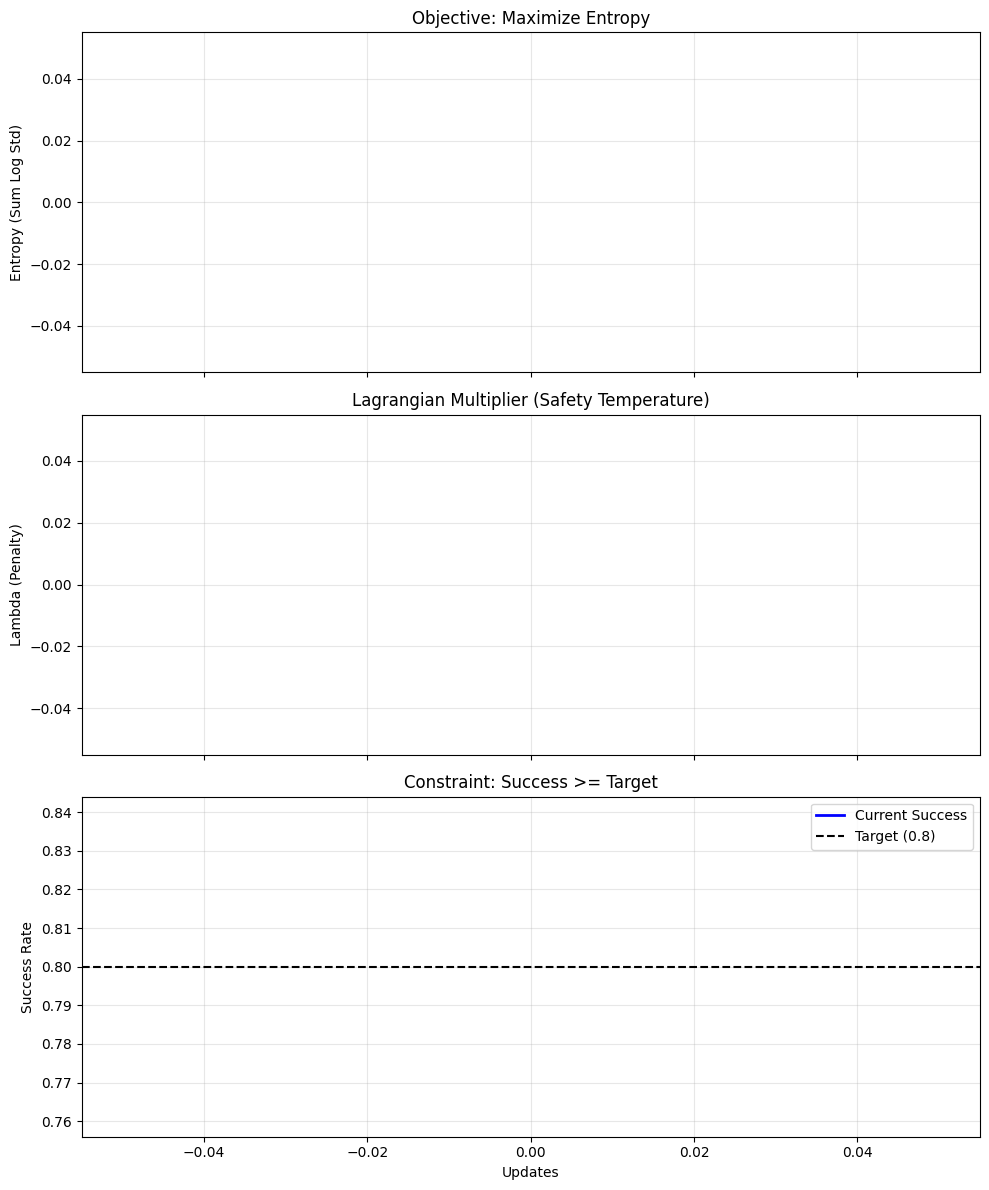

In [76]:
# Plot
# plot_learning_curve("./logs/")
plot_doraemon_dynamics(doraemon_cb) # uses the new function from utils.py

In [81]:
!pip install "gymnasium[classic-control]"

  Using cached pygame-2.6.1-cp313-cp313-win_amd64.whl.metadata (13 kB)
Using cached pygame-2.6.1-cp313-cp313-win_amd64.whl (10.6 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
# RENDERING THE TRAINED AGENT

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
import time

# --- CONFIGURATION ---
# Use the same 'model_name' from your previous cell, or type it manually here
# e.g., model_name = "SAC_doraemon_0"
env_to_render = 'CustomCartPole-source-v0' # Change to 'target' to see the Real/Shifted env

# 1. Setup the Environment with Rendering Enabled
# render_mode="human" creates the popup window
env = DummyVecEnv([lambda: gym.make(env_to_render, render_mode="human")])

# 2. Load the Normalization Statistics (CRITICAL)
# If you skip this, the agent will see "wrong" numbers and fail immediately
model_name = "final"  # Change this to your model name
norm_path = f"./logs/cartpole_doraemon/{model_name}_vecnormalize.pkl"
try:
    env = VecNormalize.load(norm_path, env)
    # We must disable training and reward normalization for inference
    env.training = False
    env.norm_reward = False
    print(f"Loaded Normalization stats from {norm_path}")
except FileNotFoundError:
    print("Warning: No normalization stats found. Running with RAW observations.")

# 3. Load the Trained Model
model_path = f"./logs/cartpole_doraemon/{model_name}_model.zip"
model = PPO.load(model_path)

# 4. The Simulation Loop
print(f"Starting rendering for {env_to_render}...")
obs = env.reset()

try:
    # Run for 1000 steps (or until you stop it)
    for _ in range(1000):
        # Get the action from the agent
        action, _ = model.predict(obs, deterministic=True)
        
        # Step the environment
        obs, rewards, dones, info = env.step(action)
        
        # Render the frame
        env.render()
        
        # Slow down slightly so you can see what's happening (Macs run this very fast)
        time.sleep(0.02)
        
        if dones[0]:
            print("Agent fell over! Resetting...")
            obs = env.reset()
            # time.sleep(1.0) # Pause briefly on failure if you want to see the crash

except KeyboardInterrupt:
    print("Simulation stopped by user.")
finally:
    env.close()

Starting rendering for CustomCartPole-source-v0...
Agent fell over! Resetting...
Agent fell over! Resetting...
